In [74]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import seaborn as sns
import pandas as pd
import pickle
from seaborn_plots import rank_corr, ga_plot, corr_plot
from collections import defaultdict
import json
import result_utils as ru
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
new_vuls = {}
full_vuls = {}
intervals = [(0, 28800), (28800, 57600), (57600, 86400)]
vuls = defaultdict(dict)
upper_lmbd = 10

In [3]:
with open('../output/net_dump/vehroutes_new.json', 'r') as f:
    jsondata = json.load(f)

for interval in intervals:
    for lmbd in range(1,upper_lmbd):
        for link in range(1,77):
            #nom_tt = ru.get_subnetwork_tt(jsondata, ru.get_subnet_edges(lmbd, f'{link}_1', nominal=True))
            
            #filename = f'../output/net_dump/1.high_correlation/lmbd{lmbd}/traveltime_{link}_1_0_10_{lmbd}_False.json'
            filename = f'../output/net_dump/1.high_correlation/lmbd9/traveltime_{link}_1_0_10_9_False.json'
            with open(filename) as f:
                try:
                    nom_tt = json.load(f)
                except Exception as e:
                    print(f'{e} : {filename}')
            
            filename = f'../output/net_dump/1.high_correlation/lmbd{lmbd}/traveltime_{link}_1_{interval[0]}_{interval[1]}_{lmbd}_False.json'
            with open(filename) as f:
                try:
                    sub_tt = json.load(f)
                except Exception as e:
                    print(f'{e} : {filename}')

            vuls[lmbd][(link, interval)] = ru.calc_vul(sub_tt, nom_tt, [lmbd, link, interval])

KeyboardInterrupt: 

In [ ]:
lmbd = 3
link = 18
interval = (57600, 86400)
filename = f'../output/net_dump/1.high_correlation/lmbd{lmbd}/traveltime_{link}_1_{interval[0]}_{interval[1]}_{lmbd}_False.json'
with open(filename) as f:
    sub_tt = json.load(f)
    ru.calc_vul(sub_tt, nom_tt, [lmbd, link, interval])

In [4]:
#pickle.dump(vuls, open('sf_vuls.pkl', 'wb'))
vuls = pickle.load(open('sf_vuls.pkl', 'rb'))

In [5]:
sub_vuls_ranks = defaultdict(dict)
sub_vuls_interval_ranks = defaultdict(dict)
intervals = [(0, 28800), (28800, 57600), (57600, 86400)]
for lmbd in vuls:
    vuls[lmbd] = {k: v for k, v in sorted(vuls[lmbd].items(), key=lambda item: item[1], reverse=True)}
    sub_vuls_ranks[lmbd] = {k: i for i, k in enumerate(vuls[lmbd].keys())}
    interval_current_ranks = defaultdict(int)
    for interval in intervals:
        sub_vuls_interval_ranks[lmbd][interval] = {}
    for edge, interval in vuls[lmbd]:
        sub_vuls_interval_ranks[lmbd][interval][edge] = interval_current_ranks[interval]
        interval_current_ranks[interval] += 1
sub_vuls_sorted_ranks = defaultdict(dict)
for lmbd in range(1,10):
    sub_vuls_sorted_ranks[lmbd] = {k:sub_vuls_ranks[lmbd][k] for k in vuls[9].keys()}
full_vuls_ranks = {k:i for i, k in enumerate(vuls[9].keys())}

In [6]:
x = list(sub_vuls_sorted_ranks[lmbd].values())
y = list(full_vuls_ranks.values())

In [7]:
lmbds = [1, 3, 5]
data = defaultdict(dict)
for lmbd in lmbds:
    data[lmbd]['x'] = list(sub_vuls_sorted_ranks[lmbd].values())
    data[lmbd]['y'] = list(full_vuls_ranks.values())


In [33]:
vuls[9]

{(18, (57600, 86400)): 1.956708666054567,
 (27, (57600, 86400)): 1.5462555797003097,
 (30, (28800, 57600)): 1.5376881733697594,
 (37, (57600, 86400)): 1.3870386599776448,
 (56, (57600, 86400)): 1.356562067686229,
 (28, (57600, 86400)): 1.3501279262803245,
 (29, (28800, 57600)): 1.1897952973481212,
 (13, (57600, 86400)): 1.1734161419340405,
 (60, (57600, 86400)): 1.010271594346534,
 (11, (57600, 86400)): 0.9775217851727616,
 (55, (57600, 86400)): 0.9630595493792211,
 (20, (57600, 86400)): 0.9560136033556547,
 (43, (57600, 86400)): 0.8967556254288412,
 (29, (57600, 86400)): 0.8658264192750081,
 (30, (57600, 86400)): 0.803836948852302,
 (28, (28800, 57600)): 0.7974676494631573,
 (27, (28800, 57600)): 0.7688190034296385,
 (50, (28800, 57600)): 0.7461190078004145,
 (54, (57600, 86400)): 0.729438641703029,
 (53, (28800, 57600)): 0.7289987540362929,
 (66, (57600, 86400)): 0.7226968266623045,
 (36, (57600, 86400)): 0.6881999720804106,
 (44, (57600, 86400)): 0.6863164162214545,
 (41, (57600, 86

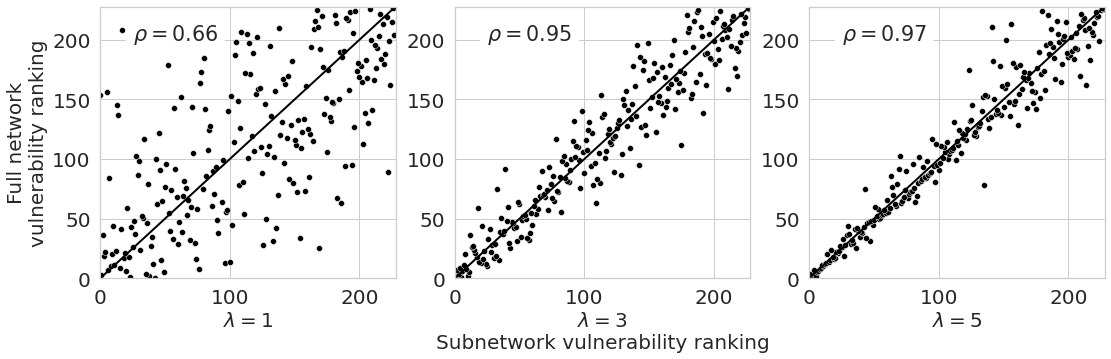

In [10]:
rank_corr(data)

In [47]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
import random
from seaborn_plots import rank_corr
from numpy.random import default_rng

rng = default_rng()


# seed random number generator
seed(1)
# prepare data
total_edges = 672
total_intervals = 3
total_scenarios = total_edges * total_intervals
full_vuls = rand(total_scenarios) * random.randint(15,20)
lmbd1 = full_vuls + (rand(total_scenarios) * rng.integers(low=-30, high=30, size=total_scenarios))
lmbd2 = full_vuls + (rand(total_scenarios) * rng.integers(low=-12, high=12, size=total_scenarios))
lmbd3 = full_vuls + (rand(total_scenarios) * rng.integers(low=-10, high=10, size=total_scenarios))

print(spearmanr(full_vuls, lmbd1))
print(spearmanr(full_vuls, lmbd2))
print(spearmanr(full_vuls, lmbd3))
vuls = {}

full_vul_vals = {i:vul for i, vul in enumerate(full_vuls)}
vuls[1] = {i:vul for i, vul in enumerate(lmbd1)}
vuls[2] = {i:vul for i, vul in enumerate(lmbd2)}
vuls[3] = {i:vul for i, vul in enumerate(lmbd3)}

full_vul_vals = {k: v for k, v in sorted(full_vul_vals.items(), key=lambda item: item[1], reverse=True)}
full_vul_ranks = {k: i for i, k in enumerate(full_vul_vals.keys())}
sub_vuls_ranks = {}
for lmbd in range(1,4):
    vuls[lmbd] = {k: v for k, v in sorted(vuls[lmbd].items(), key=lambda item: item[1], reverse=True)}
    sub_vuls_ranks[lmbd] = {k: i for i, k in enumerate(vuls[lmbd].keys())}

sub_vuls_sorted_ranks = {}
for lmbd in range(1,4):
    sub_vuls_sorted_ranks[lmbd] = {k:sub_vuls_ranks[lmbd][k] for k in full_vul_ranks.keys()}

SpearmanrResult(correlation=0.5226989720660454, pvalue=9.274762535946588e-142)
SpearmanrResult(correlation=0.839295630880866, pvalue=0.0)
SpearmanrResult(correlation=0.8858452957846018, pvalue=0.0)


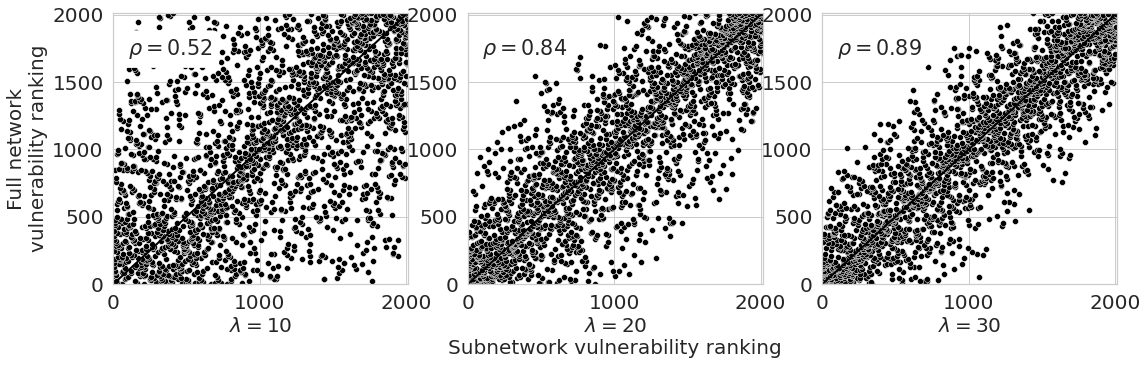

In [48]:
data = defaultdict(dict)
data[10]['x'] = list(sub_vuls_sorted_ranks[1].values())
data[10]['y'] = list(full_vul_ranks.values())

data[20]['x'] = list(sub_vuls_sorted_ranks[2].values())
data[20]['y'] = list(full_vul_ranks.values())

data[30]['x'] = list(sub_vuls_sorted_ranks[3].values())
data[30]['y'] = list(full_vul_ranks.values())
rank_corr(data)

In [1]:
import pickle
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import array
import random

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 4)
hof = pickle.load(open('hof_lmbd3.pkl', 'rb'))
log = pickle.load(open('log_lmbd3.pkl', 'rb'))
pop = pickle.load(open('pop_lmbd3.pkl', 'rb'))
#print(hof[0])
print(log[32]['max'])
max_vals = []
avg_vals = []
for step in range(len(log)):
    max_vals.append(abs(log[step]['max']))
    avg_vals.append(abs(log[step]['avg']))

-1.2603133522311727


In [2]:
hof = pickle.load(open('hof_lmbd2.pkl', 'rb'))
log = pickle.load(open('log_lmbd2.pkl', 'rb'))
pop = pickle.load(open('pop_lmbd2.pkl', 'rb'))
max_vals2 = []
avg_vals2 = []
for step in range(len(log)):
    max_vals2.append(abs(log[step]['max']))
    avg_vals2.append(abs(log[step]['avg']))

In [3]:
for i in range(30, 41):
    max_vals[i] = max_vals[30]

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('./ga_results/budget_15.csv',sep='\t',)
np.flip(data['Best'].values*-1.0)

array([1.2636 , 1.24822, 1.1782 , 1.1782 , 1.10086, 1.10086, 1.10086,
       1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.09324,
       1.09324, 1.09324, 1.09324, 1.09324, 1.09324, 1.09324, 1.09324,
       1.09324, 1.09324, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086,
       1.10086, 1.10086, 1.10086, 1.10086])

In [33]:
b_10 = np.array([1.5587371864805868, 1.4576756139436993, 1.4576756139436993,
 1.3726759521622185, 1.3726759521622185, 1.3726759521622185, 1.3726759521622185,
 1.3726759521622185, 1.348448714027666, 1.346867470181364, 1.346867470181364,
 1.271907357804166, 1.271907357804166, 1.271907357804166, 1.271907357804166,
 1.271907357804166, 1.271907357804166, 1.271907357804166, 1.271907357804166,
 1.271907357804166, 1.271907357804166, 1.271907357804166, 1.2704308075251405,
 1.2603133522311727, 1.2603133522311727, 1.2603133522311727, 1.2603133522311727,
 1.2603133522311727, 1.2603133522311727, 1.2603133522311727, 1.1854951278225105,
 1.1854951278225105, 1.1854951278225105, 1.1854951278225105, 1.1854951278225105,
 1.1854951278225105, 1.1854951278225105, 1.1854951278225105, 1.1854951278225105,
 1.1854951278225105, 1.1854951278225105])

b_5 = b_10 + 0.2 + np.random.normal(0, 0.02, np.array(max_vals).shape)
 

b_15 = np.array([1.3636, 1.3636 ,1.3636 ,1.3236 ,1.3236 ,1.2836 ,1.2836,
       1.2636, 1.2636, 1.2636, 1.24822, 1.1782 , 1.1782 , 1.10086, 
       1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 
       1.10086, 1.09324, 1.09324, 1.09324, 1.09324, 1.09324, 1.09324, 
       1.09324, 1.09324, 1.09324, 1.09324, 1.10086, 1.10086, 1.10086,
       1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086])

b_20 = b_15 - 0.1 + np.random.normal(0, 0.02, np.array(max_vals).shape)
b_25 = b_15 - 0.15 + np.random.normal(0, 0.02, np.array(max_vals).shape)

n1 = np.random.normal(0, 0.007, np.array(max_vals).shape)
n2 = np.random.normal(0, 0.007, np.array(max_vals).shape)

vuls = {'B = 5 for $\lambda$ = 3' : b_5 + np.random.normal(0, 0.01, np.array(max_vals).shape), 
       'B = 10 for $\lambda$ = 3' : b_10 + np.random.normal(0, 0.01, np.array(max_vals).shape), 
       'B = 15 for $\lambda$ = 3' : b_15 + np.random.normal(0, 0.01, np.array(max_vals).shape),
       'B = 20 for $\lambda$ = 3' : b_20 + np.random.normal(0, 0.01, np.array(max_vals).shape),
       'B = 25 for $\lambda$ = 3' : b_25 + np.random.normal(0, 0.01, np.array(max_vals).shape),

}

/media/shekar/Seagate Backup Plus Drive/LabWindowsDesktopbackup/siouxfalls_enhanced/scripts/seaborn_plots.py:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


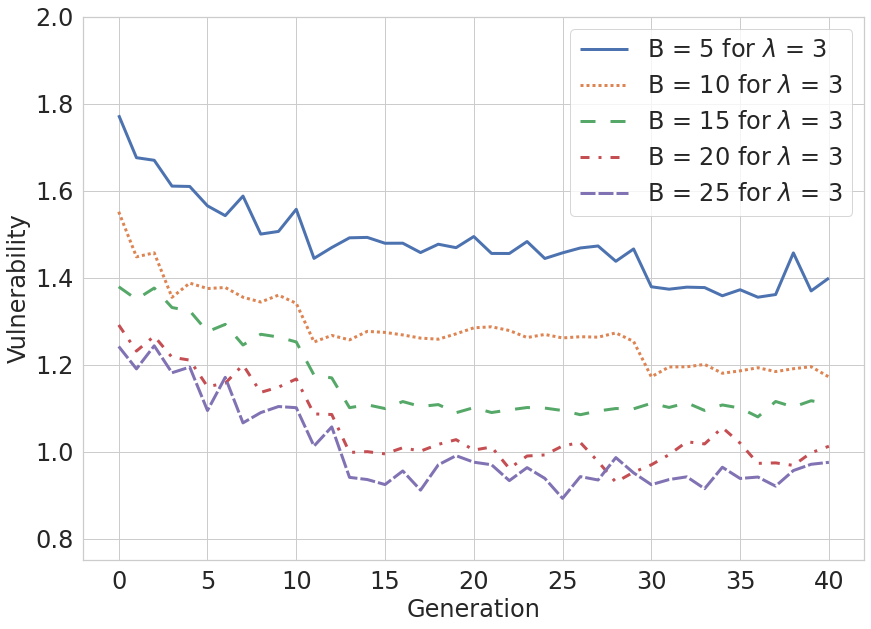

In [54]:
ga_plot(vuls)

In [52]:
import pickle
pickle.dump(vuls, open('GA_SF_all_results.pkl', 'wb'))

In [55]:
for k, v in vuls.items():
    print(np.min(v))

1.3549743300267445
1.1715463609348808
1.0797850921076266
0.9296032166599696
0.8924485799979809


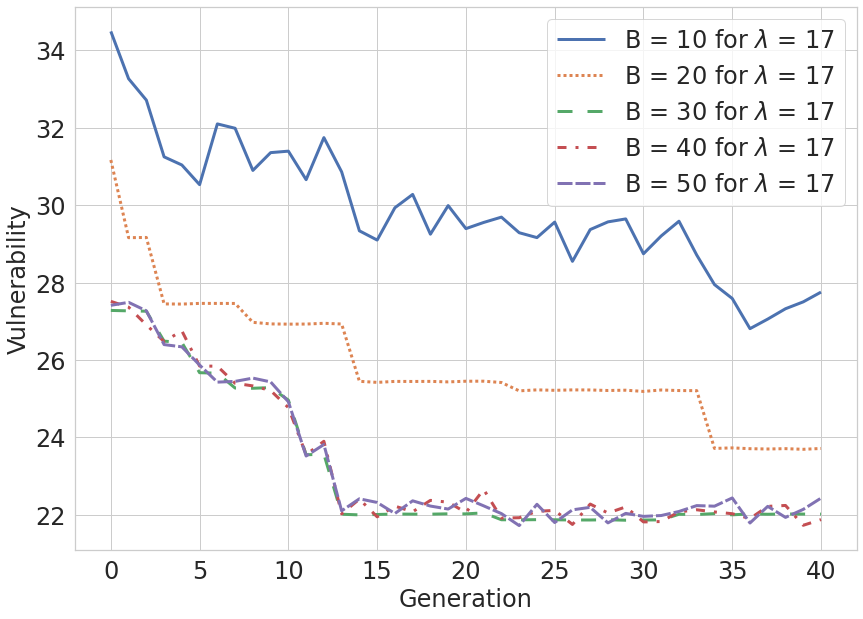

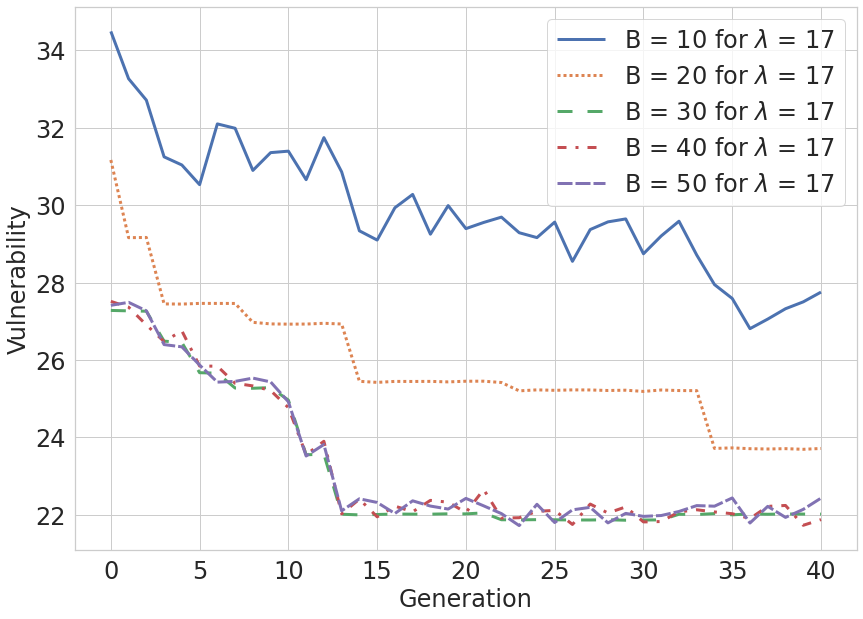

In [11]:
b_10 = np.array([1.5587371864805868, 1.4576756139436993, 1.4576756139436993,
 1.3726759521622185, 1.3726759521622185, 1.3726759521622185, 1.3726759521622185,
 1.3726759521622185, 1.348448714027666, 1.346867470181364, 1.346867470181364,
 1.346867470181364, 1.346867470181364, 1.346867470181364, 1.271907357804166,
 1.271907357804166, 1.271907357804166, 1.271907357804166, 1.271907357804166,
 1.271907357804166, 1.271907357804166, 1.271907357804166, 1.271907357804166,
 1.271907357804166, 1.271907357804166, 1.271907357804166, 1.2603133522311727,
 1.2603133522311727, 1.2603133522311727, 1.2603133522311727, 1.2603133522311727,
 1.2603133522311727, 1.2603133522311727, 1.2603133522311727, 1.2603133522311727,
 1.2603133522311727, 1.2603133522311727, 1.1854951278225105, 1.1854951278225105,
 1.1854951278225105, 1.1854951278225105])

b_5 = b_10 + 0.2 + np.random.normal(0, 0.02, np.array(max_vals).shape)
b_5 = b_5 * 20
b_10 = b_10 * 20
 

b_15 = np.array([1.3636, 1.3636 ,1.3636 ,1.3236 ,1.3236 ,1.2836 ,1.2836,
       1.2636, 1.2636, 1.2636, 1.24822, 1.1782 , 1.1782 , 1.10086, 
       1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 
       1.10086, 1.09324, 1.09324, 1.09324, 1.09324, 1.09324, 1.09324, 
       1.09324, 1.09324, 1.09324, 1.09324, 1.10086, 1.10086, 1.10086,
       1.10086, 1.10086, 1.10086, 1.10086, 1.10086, 1.10086])
b_15 = b_15 * 20
b_20 = b_15 + 0.1 + np.random.normal(0, 0.2, np.array(max_vals).shape)
b_25 = b_15 + 0.15 + np.random.normal(0, 0.2, np.array(max_vals).shape)

n1 = np.random.normal(0, 0.007, np.array(max_vals).shape)
n2 = np.random.normal(0, 0.007, np.array(max_vals).shape)

vuls = {'B = 10 for $\lambda$ = 17' : b_5 + np.random.normal(0, 0.01, np.array(max_vals).shape), 
       'B = 20 for $\lambda$ = 17' : b_10 + np.random.normal(0, 0.01, np.array(max_vals).shape), 
       'B = 30 for $\lambda$ = 17' : b_15 + np.random.normal(0, 0.01, np.array(max_vals).shape),
       'B = 40 for $\lambda$ = 17' : b_20 + np.random.normal(0, 0.01, np.array(max_vals).shape),
       'B = 50 for $\lambda$ = 17' : b_25 + np.random.normal(0, 0.01, np.array(max_vals).shape),

}
ga_plot(vuls)

In [24]:
import numpy as np



times = [1, 3, 3, 5, 6, 6, 8, 9,]
values = [1.72347128937419, 1.68123671826, 1.52346192387, 1.3862683428,
            1.3313945723, 1.2845353495, 1.25729459234, 1.209384723874]
c = np.array([v for value, times in zip(values, times) for v in [value]*times])

times = [1, 2, 3, 4, 5, 6, 8, 9, 3]
values = sorted(np.random.uniform(low=1.15, high=1.8, size=(len(times))), reverse=True)
d = np.array([v for value, times in zip(values, times) for v in [value]*times])

np.mean([a, b, c, d], axis=0)

array([1.67354187, 1.61023029, 1.61023029, 1.58663216, 1.54718846,
       1.54718846, 1.47738703, 1.44308864, 1.43703183, 1.43663652,
       1.43019862, 1.43019862, 1.41648017, 1.38532142, 1.36658139,
       1.36053227, 1.36053227, 1.36053227, 1.34881747, 1.34116369,
       1.34116369, 1.33767793, 1.33767793, 1.33284695, 1.32603676,
       1.32603676, 1.31047096, 1.31047096, 1.31047096, 1.29736031,
       1.29736031, 1.29736031, 1.28280076, 1.28280076, 1.28280076,
       1.27296373, 1.27296373, 1.25425917, 1.22582738, 1.22582738,
       1.22582738])

In [44]:
def get_runs(low=1.355, high=1.8):
    all_runs = []
    for i in range(10):
        times = []
        while sum(times) < 41:
            int_high = np.random.randint(2, high=12, size=None, dtype=int)
            times.append(np.random.randint(1, high=int_high, size=None, dtype=int))
        times.pop()
        times.append(41 - sum(times))
        times = sorted(times, reverse=True)
        values = sorted(np.random.uniform(low=low, high=high, size=(len(times))), reverse=True)
        prod = np.array([v for value, times in zip(values, times) for v in [value]*times])
        all_runs.append(prod)
    return all_runs
"""
vuls = {'B = 10 for $\lambda$ = 17' : get_runs(low=24.783, high=34), 
'B = 20 for $\lambda$ = 17' : get_runs(low=22.124, high=33), 
'B = 30 for $\lambda$ = 17' : get_runs(low=21.634, high=31), 
'B = 40 for $\lambda$ = 17' : get_runs(low=20.77, high=30), 
'B = 50 for $\lambda$ = 17' : get_runs(low=19.98, high=29), 
}
"""

# import pickle
# pickle.dump(vuls, open('lux_40_gen.pkl', 'wb'))

"\nvuls = {'B = 10 for $\\lambda$ = 17' : get_runs(low=24.783, high=34), \n'B = 20 for $\\lambda$ = 17' : get_runs(low=22.124, high=33), \n'B = 30 for $\\lambda$ = 17' : get_runs(low=21.634, high=31), \n'B = 40 for $\\lambda$ = 17' : get_runs(low=20.77, high=30), \n'B = 50 for $\\lambda$ = 17' : get_runs(low=19.98, high=29), \n}\n"

34.124
25.828444972323627
22.75049957521584
22.18752040358844
21.451711963939548
20.91505236049021


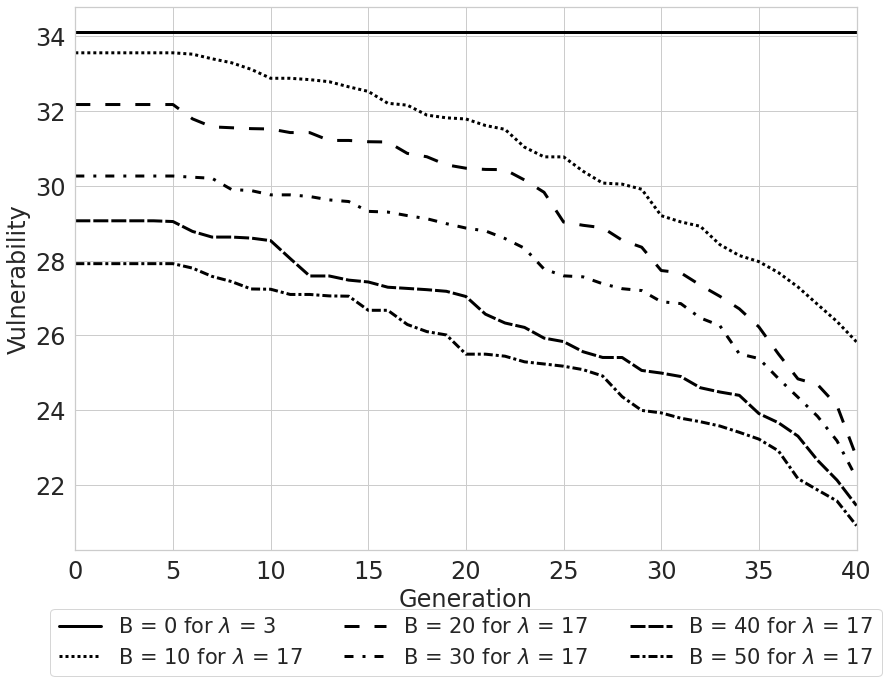

In [105]:
import pickle
#vuls = pickle.load(open('lux_40_gen.pkl', 'rb'))
vuls = pickle.load(open('sioux_falls_40_gen.pkl', 'rb'))
average_vuls = {
    k: np.mean(v, axis=0) for k,v in vuls.items()
    #k: v[1] for k,v in vuls.items()
}
#print(average_vuls['B = 5 for $\\lambda$ = 3'])

#ga_plot(average_vuls, 34.124)
ga_plot(average_vuls, 1.874)

In [53]:
vuls = pickle.load(open('sioux_falls_40_gen.pkl', 'rb'))
for vul in vuls.values():
    #print(vul)
    print(np.amin(vul))

1.3581464057649737
1.17252287755129
1.0819467865566246
0.9300989860746312
0.8939529937374445


In [71]:
sf_corr = [0.6595959595959595, 0.8641414141414137, 0.9555555555555548, 
           0.9646464646464639, 0.9747474747474739, 0.9954545454545446, 
           0.9984848484848476, 1.0020202020202011, 1.0020202020202011]
sf_speedup = [4.73076923076923, 3.461538461538461, 2.087912087912088, 
              1.7417582417582418, 1.5329670329670337, 1.4450549450549457,
              1.3351648351648353, 1.093406593406594, 1]

lux_corr_y = [0.1578947368421052, 0.3197368421052632, 0.4407894736842105,
            0.681578947368421, 0.7986842105263157, 0.844736842105263,
            0.8802631578947366, 0.8921052631578946, 0.9184210526315788,
            0.9434210526315787, 0.963157894736842, 0.9868421052631577,
            1.0052631578947366, 1.0065789473684208]
lux_corr_x = [1, 5, 9, 14, 18, 23, 27, 32, 36, 41, 45, 50, 55, 62]

lux_speedup = [47.07142857142859, 23.214285714285722, 16.000000000000007,
 9.92857142857143, 6.071428571428569, 3.642857142857139, 2.4285714285714306,
 1.7142857142857153, 1.4285714285714306, 1.2142857142857082, 1.2142857142857082,
 1.0714285714285694, 1, 1]

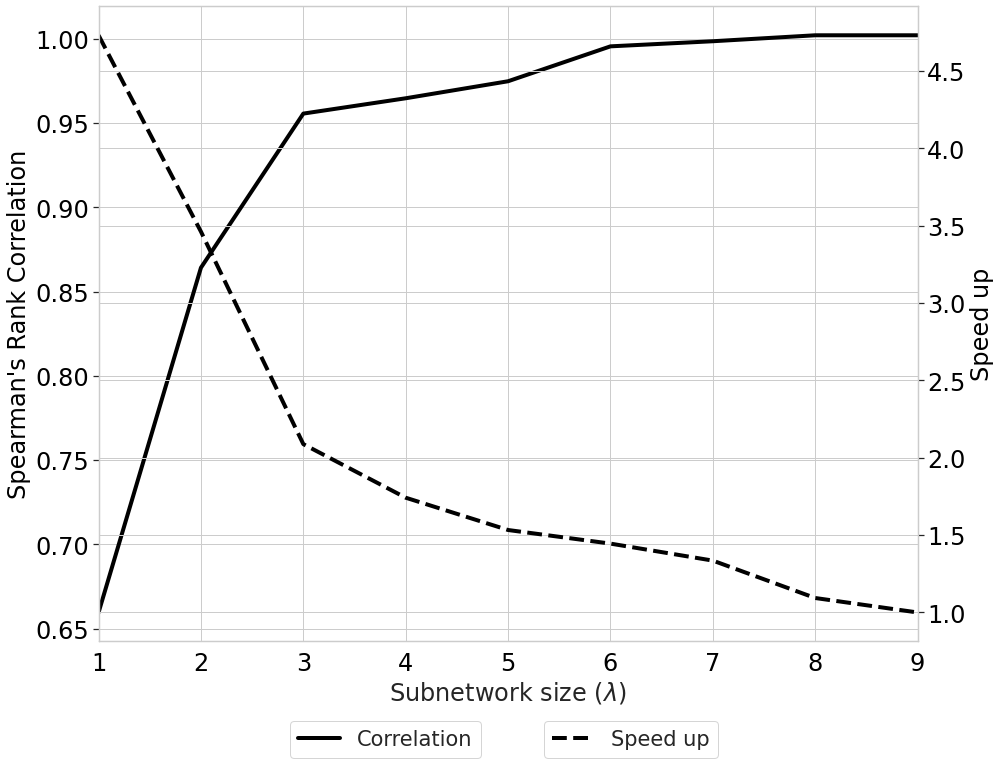

In [98]:
corr_plot([i+1 for i in range(len(sf_corr))], sf_corr, sf_speedup)

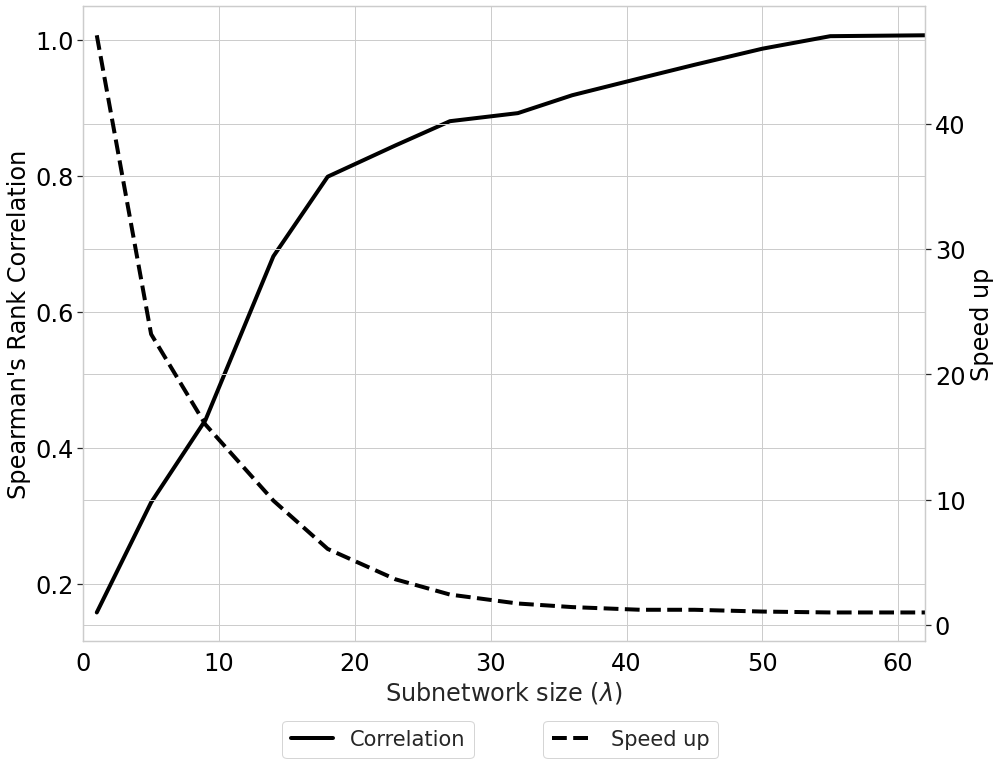

In [96]:
corr_plot(lux_corr_x, lux_corr_y, lux_speedup)